# Data Science I - Projeto final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic-data-6.csv')

## Perguntas (Questions)

    1. Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?
    2. Quais são as características comuns entre os passageiros da mesma classe? 
    3. Em qual classe havia mais familiares?
    4. Qual a proporção de tripulantes e passageiros que sobreviveram?

## Preparar dados (Wrangle data)

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df['Sex'].nunique()

2

In [7]:
# Verificar se existe campo com valor nulo
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [8]:
# Preencher valores nulos de Idade com a média
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

In [9]:
# Verificar se há passageiros não embarcados marcados como não sobreviventes.
df[df['Survived'] == 0]['Embarked'].isnull().any().sum()

0

In [10]:
# Remover passageiros sem local de embarque
df['Embarked'].dropna(how='any', inplace=True)

In [11]:
# Remover a coluna de Ticket, sem potencial de informação
df.drop(labels='Ticket', axis=1, inplace=True)

## Explorar (Explore)

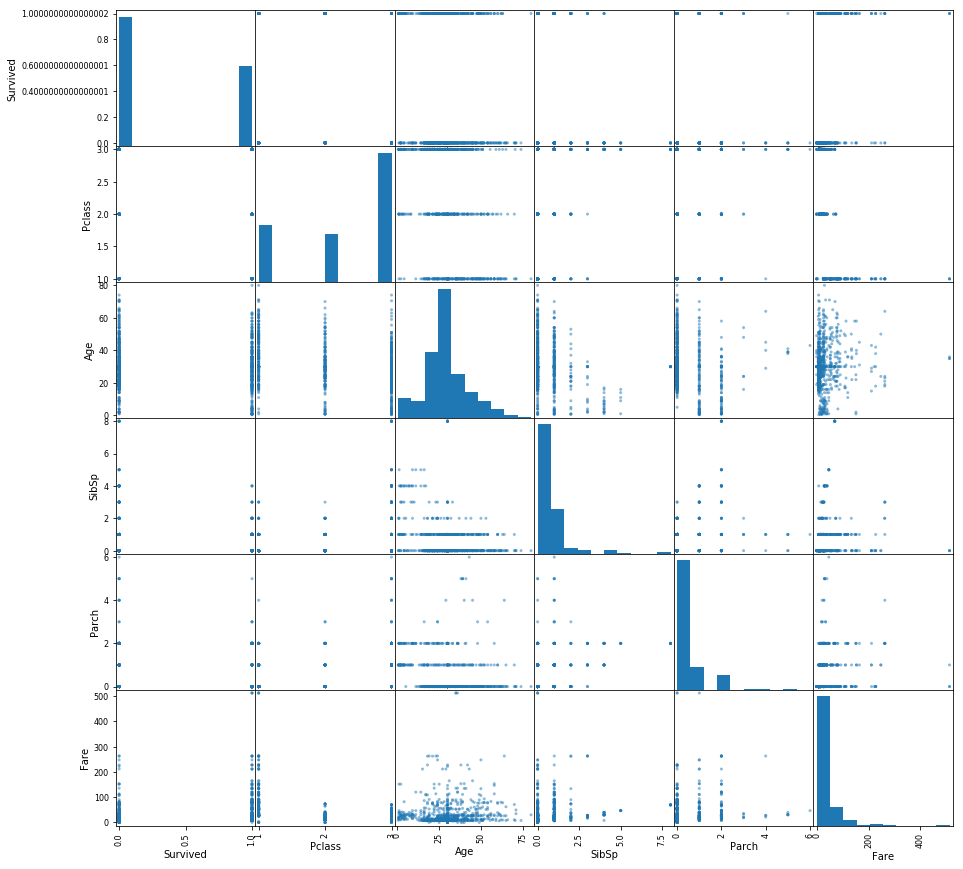

In [12]:
pd.plotting.scatter_matrix(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], figsize=(15,15));

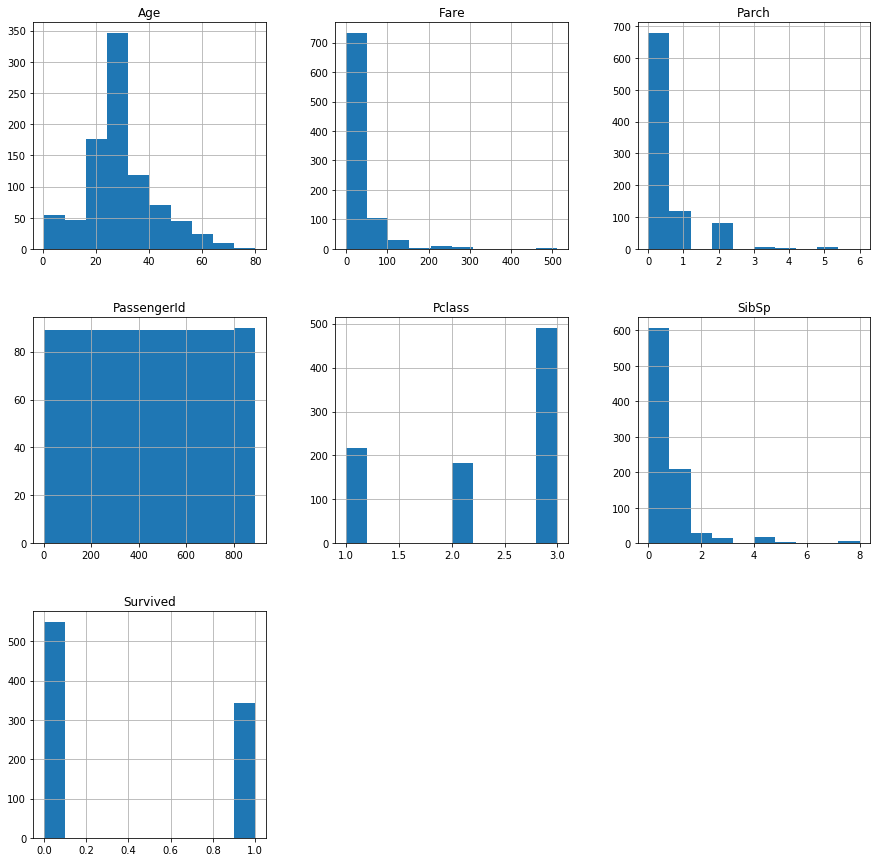

In [13]:
df.hist(figsize=(15,15));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222E8CBB710>,
      dtype=object)

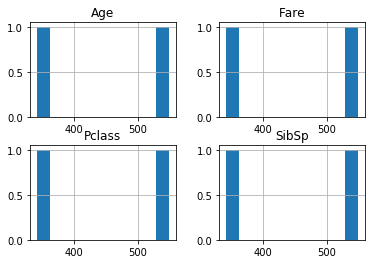

In [14]:
df.groupby('Survived')[['Age', 'Pclass', 'SibSp', 'Fare']].count().hist()

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64
Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64


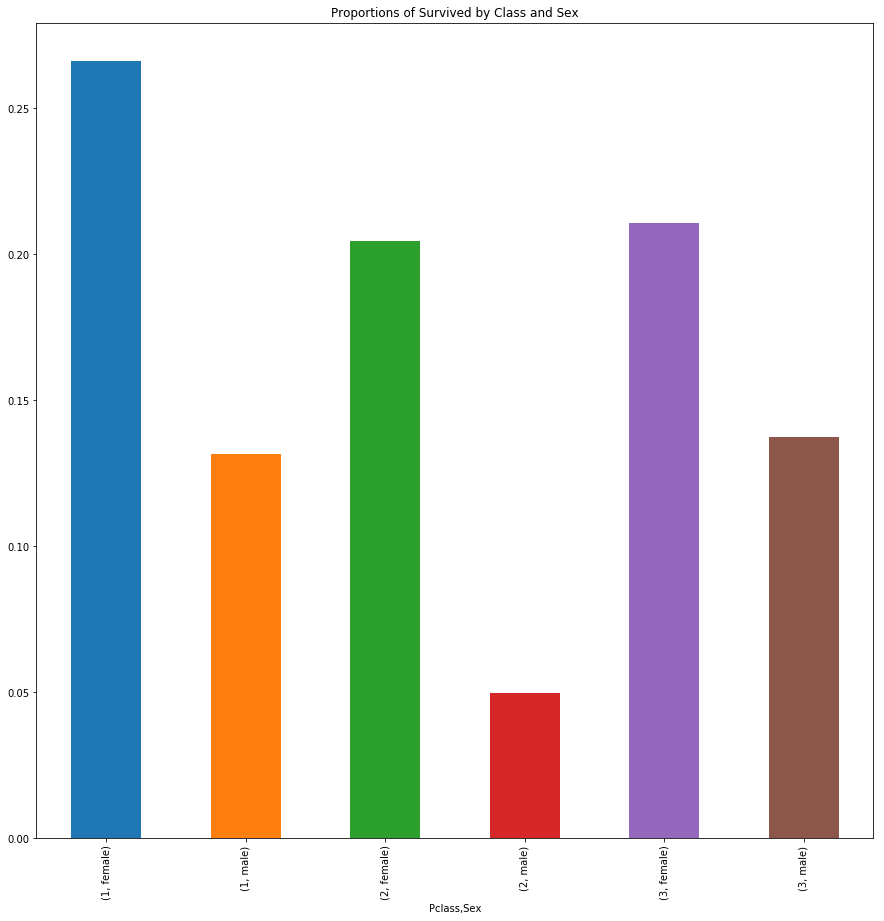

In [125]:
# DF Survived
df_surv = df[df['Survived'] == 1]
surv_proportions = df_surv.groupby('Pclass')['Sex'].value_counts()
dead_proportions = df_dead.groupby('Pclass')['Sex'].value_counts()
merged_proportions = surv_proportions + dead_proportions
print(merged_proportions)
# surv_proportions = surv_proportions / df_surv.shape[0]
# surv_proportions.plot(kind='bar', title='Proportions of Survived by Class and Sex', figsize=(15, 15));
# plt.xlabel='Class by Sex'
# plt.ylabel='Proportion'
# print(df.groupby('Pclass')['Sex'].value_counts())


Pclass  Sex   
1       male       77
        female      3
2       male       91
        female      6
3       male      300
        female     72
Name: Sex, dtype: int64


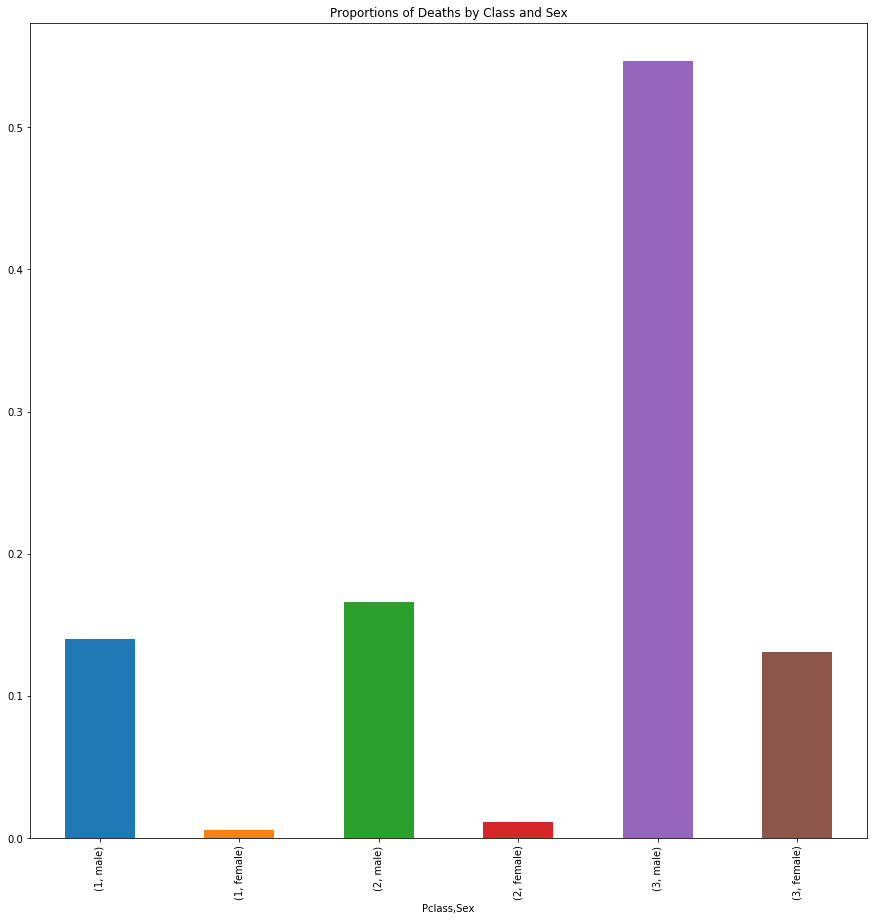

In [124]:
# DF Death
df_dead = df[df['Survived'] == 0]

dead_proportions = df_dead.groupby('Pclass')['Sex'].value_counts()
print(dead_proportions)
dead_proportions = dead_proportions / df_dead.shape[0]
dead_proportions.plot(kind='bar', title='Proportions of Deaths by Class and Sex', figsize=(15, 15));
plt.xlabel='Class and Sex'
plt.ylabel='Proportion'